In [36]:
import numpy as np


In [38]:
import pandas as pd

try:
  # Try UTF-8 encoding first
  df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
  # If UTF-8 fails, try other encodings like latin-1 or cp1252
  encodings = ['latin-1', 'cp1252']
  for encoding in encodings:
    try:
      df = pd.read_csv('spam.csv', encoding=encoding)
      break  # Exit the loop if successful
    except UnicodeDecodeError:
      pass  # Try the next encoding if UTF-8 fails

# Now you can work with your DataFrame (df)


In [39]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5119,ham,Lol for real. She told my dad I have cancer,NaN,NaN,NaN
4930,ham,"Good morning, my boytoy! How's those yummy lip...",NaN,NaN,NaN
458,ham,1.20 that call cost. Which i guess isnt bad. M...,NaN,NaN,NaN
5554,ham,Well keep in mind I've only got enough gas for...,NaN,NaN,NaN
3568,ham,She's fine. Sends her greetings,NaN,NaN,NaN


In [40]:
df.shape

(5572, 5)

data cleaning


In [41]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [45]:
df.sample()

,v1,v2
3624,ham,I want to tel u one thing u should not mistake...


In [46]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(2)

,target,text
3267,ham,Which is why i never wanted to tell you any of...
433,ham,Booked ticket for pongal?


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [48]:
df['target']=encoder.fit_transform(df['target'])
df.sample(2)

,target,text
2755,0,We r outside already.
1303,0,I cant pick the phone right now. Pls send a me...


check for missing values

In [49]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [50]:
df.duplicated().sum()

403

In [51]:
df=df.drop_duplicates(keep='first')

In [52]:
df.duplicated().sum()

0

In [53]:
df.shape

(5169, 2)

EDA

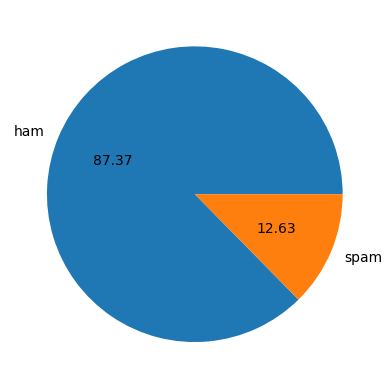

In [54]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [55]:
import nltk

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
df['num_char']=df['text'].apply(len)
df.head(1)

<ipython-input-57-486d637d1f12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111


In [58]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(1)

<ipython-input-58-d4d2cb6a1741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24


In [59]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(1)

<ipython-input-59-3180a87d52e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [60]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


spam details


In [63]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

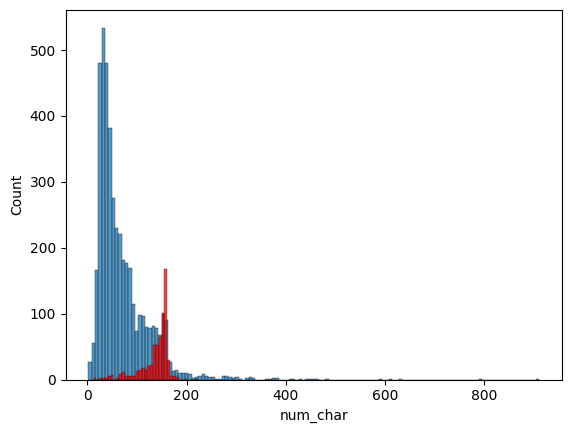

In [62]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

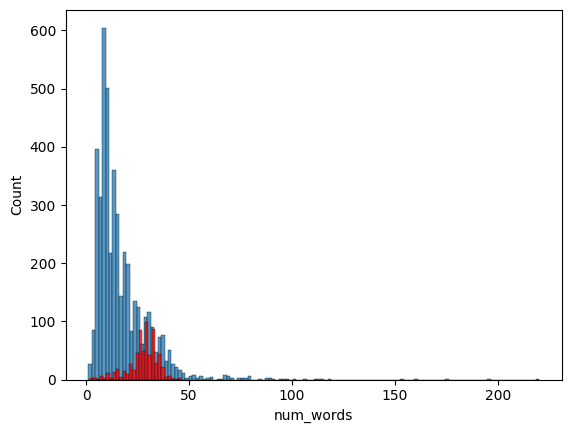

In [64]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

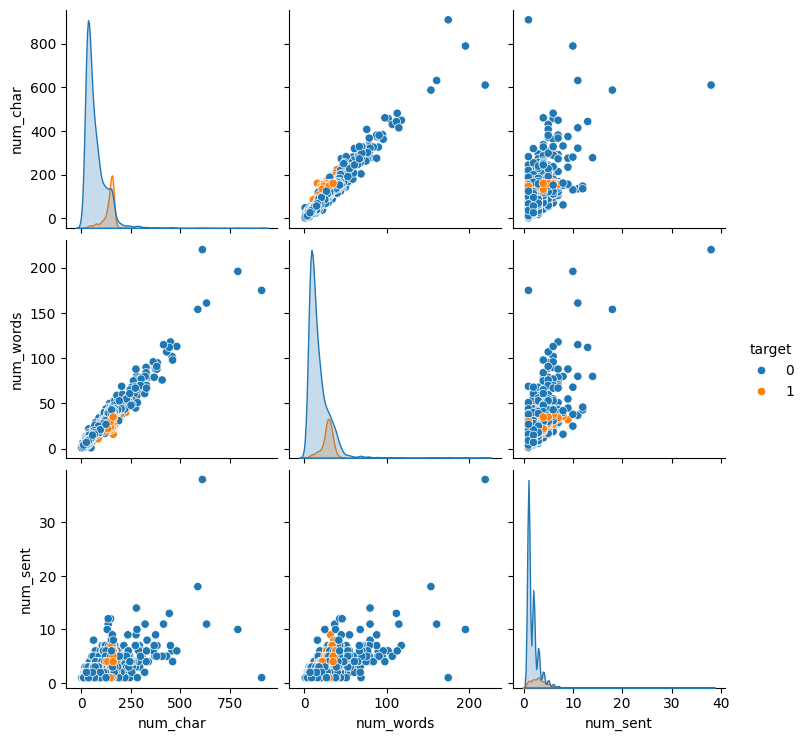

In [65]:
sns.pairplot(df,hue='target')

In [66]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
from nltk.corpus import stopwords

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
import string

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [73]:
def texttrans(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [77]:
df['text'].apply(texttrans)
df['transformed text']=df['text'].apply(texttrans)

<ipython-input-77-bed49e17a997>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed text']=df['text'].apply(texttrans)


In [78]:
df.head(1)

,target,text,num_char,num_words,num_sent,finalcell,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...


In [88]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

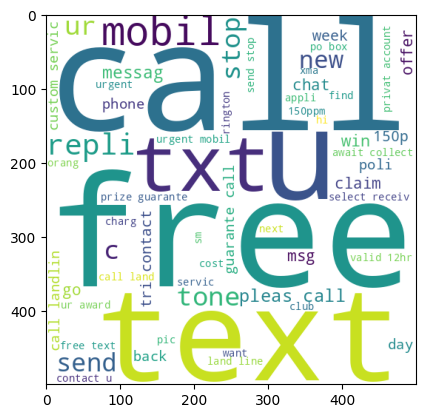

In [90]:
spam_rep=wc.generate(df[df['target'] ==1]['transformed text'].str.cat(sep=" "))
plt.imshow(spam_rep)

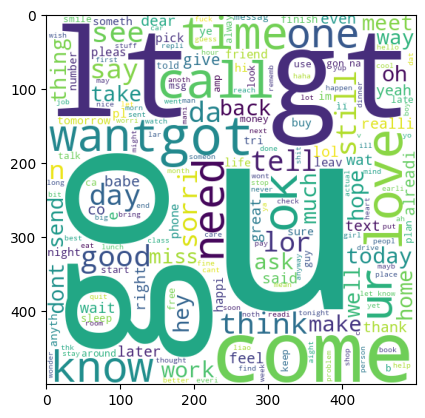

In [91]:
ham_rep=wc.generate(df[df['target'] ==0]['transformed text'].str.cat(sep=" "))
plt.imshow(ham_rep)

In [93]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [94]:
len(spam_corpus)

9939

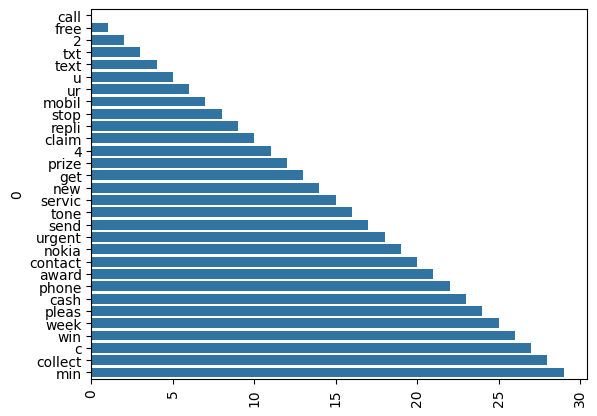

In [110]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [111]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [112]:
len(ham_corpus)

35404

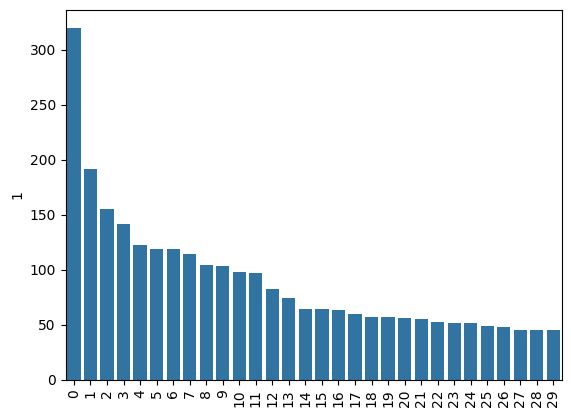

In [113]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [140]:
x=tfidf.fit_transform(df['transformed text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
x.shape
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [160]:
# Logistic Regression
ls = LogisticRegression(solver='liblinear',penalty='l1')

# Support Vector Machine
svm = SVC(kernel='sigmoid',gamma=1.0)

# Random Forest
rf = RandomForestClassifier(n_estimators=50,random_state=2)

# XGBoost
xgb= XGBClassifier(n_estimators=50,random_state=2)

# Decision Tree
dt= DecisionTreeClassifier(max_depth=5)

# K-Nearest Neighbors
knn= KNeighborsClassifier()

# AdaBoost
ada= AdaBoostClassifier(n_estimators=50,random_state=2)

# Extra Trees
et= ExtraTreesClassifier(n_estimators=50,random_state=2)

# Bagging
bag= BaggingClassifier(n_estimators=50,random_state=2)

# Gradient Boosting
gb= GradientBoostingClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()


In [161]:
clfs={
    'log':ls,'SVC':svm,'RF':rf,'XGB':xgb,'DT':dt,'KNN':knn,'ADA':ada,'ET':et,'BAG':bag,'GB':gb,'MNB':mnb
}

In [162]:
def trainclf(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_predict=clf.predict(X_test)
  a=accuracy_score(Y_test,y_predict)
  p=precision_score(Y_test,y_predict)
  return a,p

In [165]:
a_s=[]
ps=[]
for name,clf in clfs.items():
  c_a,c_p=trainclf(clf,X_train,Y_train,X_test,Y_test)
  print("FOR:",name)
  print("Accuracy",c_a)
  print("Precision",c_p)
  a_s.append(c_a)
  ps.append(c_p)


FOR: log
Accuracy 0.9516441005802708
Precision 0.94
FOR: SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828
FOR: RF
Accuracy 0.971953578336557
Precision 1.0
FOR: XGB
Accuracy 0.9729206963249516
Precision 0.9435483870967742
FOR: DT
Accuracy 0.9352030947775629
Precision 0.8380952380952381
FOR: KNN
Accuracy 0.9003868471953579
Precision 1.0
FOR: ADA
Accuracy 0.9613152804642167
Precision 0.9454545454545454
FOR: ET
Accuracy 0.9729206963249516
Precision 0.9824561403508771
FOR: BAG
Accuracy 0.9584139264990329
Precision 0.8625954198473282
FOR: GB
Accuracy 0.9526112185686654
Precision 0.9238095238095239
FOR: MNB
Accuracy 0.9593810444874274
Precision 1.0


In [166]:
# prompt: generate a dataframe named perfomance_df with attributes clf.keys() named as algorithm,accuracy as a_s,precision as ps

perfomance_df = pd.DataFrame({
    'algorithm': clfs.keys(),
    'accuracy': a_s,
    'precision': ps
})


In [167]:
perfomance_df

,algorithm,accuracy,precision
0,log,0.951644,0.940000
1,SVC,0.972921,0.974138
2,RF,0.971954,1.000000
3,XGB,0.972921,0.943548
4,DT,0.935203,0.838095
5,KNN,0.900387,1.000000
6,ADA,0.961315,0.945455
7,ET,0.972921,0.982456
8,BAG,0.958414,0.862595
9,GB,0.952611,0.923810


In [169]:
# prompt: generate code to sort the above dataframe on the basis of accuracy

perfomance_df.sort_values(by=['precision'], inplace=True, ascending=False)
print(perfomance_df)


   algorithm  accuracy  precision
2         RF  0.971954   1.000000
10       MNB  0.959381   1.000000
5        KNN  0.900387   1.000000
7         ET  0.972921   0.982456
1        SVC  0.972921   0.974138
6        ADA  0.961315   0.945455
3        XGB  0.972921   0.943548
0        log  0.951644   0.940000
9         GB  0.952611   0.923810
8        BAG  0.958414   0.862595
4         DT  0.935203   0.838095
